<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/1.4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Principal Component Analysis

Principal component analysis (PCA) is commonly used for dimensionality reduction by projecting each data point onto the first few principal components, obtaining lower-dimensional data while preserving as much of the data's variation as possible. The underlying mathematics can be explained using the Singular Value Decomposition (SVD).


### 1.4.1 Singular Value Decomposition


Let $A$ be an $m \times n$ matrix. Then, $A^T A$ is symmetric and can be orthogonally diagonalized. Let $v_1, \dots, v_n$ be an orthonormal basis for $\mathbb{R}^n$ consisting of eigenvectors of $A^T A$, and let $\lambda_1, \dots, \lambda_n$ be the associated eigenvalues of $A^T A$. For $1 \leq i \leq n$:


$$\|A v_i\|^2 = (A v_i)^T A v_i = v_i^T A^T A v_i = v_i^T (\lambda_i v_i) = \lambda_i$$


Thus, the eigenvalues of $A^T A$ are non-negative. The singular values of $A$ are the square roots of these eigenvalues, denoted by $\sigma_1, \dots, \sigma_n$, arranged in decreasing order: $\sigma_i = \sqrt{\lambda_i}$.

The Singular Value Decomposition (SVD) of $A$ is given by:

$$
A = U \Sigma V^T
$$

Where:
- $U$ is an $m \times m$ orthogonal matrix (left singular vectors),
- $\Sigma$ is an $m \times n$ diagonal matrix of singular values,
- $V$ is an $n \times n$ orthogonal matrix (right singular vectors).


Reconstructed matrix:
 [[3. 1. 1. 2.]
 [4. 3. 1. 3.]
 [2. 1. 3. 1.]
 [1. 2. 2. 2.]]


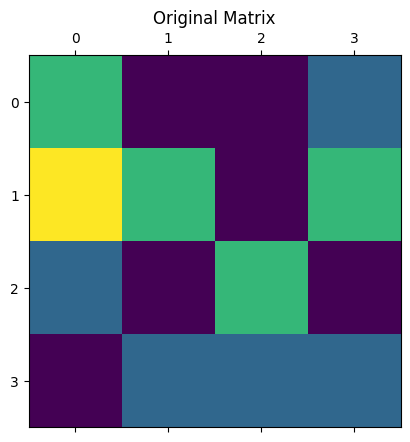

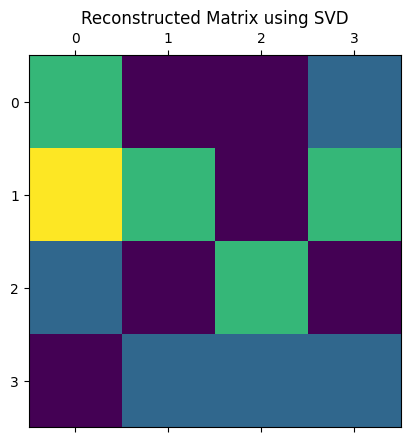

In [12]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3, 1, 1, 2],
              [4, 3, 1, 3],
              [2, 1, 3, 1],
              [1, 2, 2, 2]])

# SVD
U, s, Vt = np.linalg.svd(A)

# Reconstruct matrix A using all components
S_full = np.zeros((A.shape[0], A.shape[1]))
S_full[:len(s), :len(s)] = np.diag(s)
A_reconstructed = U.dot(S_full).dot(Vt)

print("Reconstructed matrix:\n", A_reconstructed)

plt.matshow(A, cmap='viridis')
plt.title('Original Matrix')
plt.show()

plt.matshow(A_reconstructed, cmap='viridis')
plt.title('Reconstructed Matrix using SVD')
plt.show()


### 1.4.2 Low-Rank Matrix Approximations

In this section, we discuss low-rank approximations of matrices. We first introduce matrix norms, which allow us to discuss the distance between two matrices.

$$$$

**Definition (Induced Norm)**

The 2-norm of a matrix $A \in \mathbb{R}^{n \times m}$ is defined as:

$$
\|A\|_2 = \max_{x \neq 0} \frac{\|Ax\|}{\|x\|} = \max_{\|x\| = 1} \|Ax\| = \max_{\|x\| = 1} x^T A^T A x
$$

Let $A \in \mathbb{R}^{n \times m}$ be a matrix with Singular Value Decomposition (SVD):

$$
A = \sum_{j=1}^{r} \sigma_j u_j v_j^T
$$

For $k < r$, truncate the sum at the $k$-th term:

$$
A_k = \sum_{j=1}^{k} \sigma_j u_j v_j^T
$$

The rank of $A_k$ is exactly $k$.


**Lemma (Matrix Norms and Singular Values)**

Let $A \in \mathbb{R}^{n \times m}$ be a matrix with SVD:

$$
A = \sum_{j=1}^{r} \sigma_j u_j v_j^T
$$

Where $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$. Let $A_k$ be the truncated sum as defined above. Then:

$$
\|A - A_k\|_2^2 = \sigma_{k+1}^2
$$

**Theorem (Eckart-Young-Mirsky Theorem)**

Let $A \in \mathbb{R}^{n \times m}$ be a matrix with SVD:

$$
A = \sum_{j=1}^{r} \sigma_j u_j v_j^T
$$

Let $A_k$ be the truncated sum with $k < r$. For any matrix $B \in \mathbb{R}^{n \times m}$ of rank at most $k$:

$$
\|A - A_k\|_2 \leq \|A - B\|_2
$$

This guarantees that $A_k$ is the best rank-$k$ approximation of $A$ in terms of minimizing the induced 2-norm.

Low-rank approximation:
 [[2.38897798 1.670709   1.4100092  1.87237713]
 [3.68702901 2.57848862 2.17613761 2.88973312]
 [2.14289296 1.49861178 1.26476628 1.67950638]
 [2.09920197 1.4680569  1.23897923 1.64526329]]


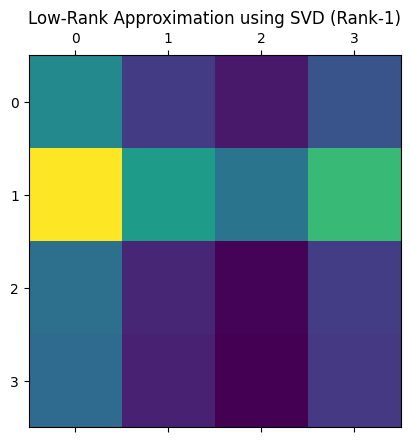

In [13]:
# Perform low-rank approximation by keeping only the largest singular value
n_components = 1
S_low_rank = np.zeros((A.shape[0], A.shape[1]))
S_low_rank[:n_components, :n_components] = np.diag(s[:n_components])

# Reconstruct the matrix using only the top singular value
A_low_rank = U.dot(S_low_rank).dot(Vt)

print("Low-rank approximation:\n", A_low_rank)

plt.matshow(A_low_rank, cmap='viridis')
plt.title('Low-Rank Approximation using SVD (Rank-1)')
plt.show()


### 1.4.3 Principal Component Analysis

Principal Component Analysis (PCA) is commonly used for dimensionality reduction, projecting the data onto principal components that capture the maximum variance. This section covers the covariance matrix, principal component analysis, and the concept of total variance.


#### 1.4.3.1 Covariance Matrix


The covariance matrix plays a central role in Principal Component Analysis. Given a $p \times N$ matrix of observations $X = [X_1, X_2, \dots, X_N]$, the sample mean $M$ is defined as:

$$
M = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

For each observation, subtract the sample mean to form the mean-centered data matrix $B$:

$$
B = [X_1 - M, X_2 - M, \dots, X_N - M] = [\hat{X}_1, \hat{X}_2, \dots, \hat{X}_N]
$$

The covariance matrix $S$, which captures the pairwise covariances between variables, is then given by:

$$
S = \frac{1}{N-1} B B^T
$$

Since $S$ is symmetric and positive semi-definite, its eigenvalues are non-negative. These eigenvalues are crucial for identifying the principal components.


Covariance Matrix:
 [[ 9.07610341 -0.74497837]
 [-0.74497837  8.62733024]]


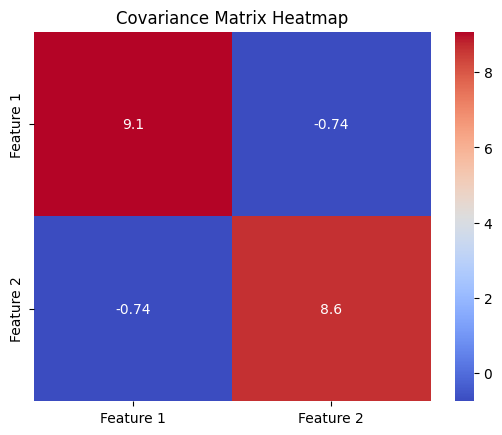

In [26]:
import seaborn as sns

np.random.seed(42)
X = np.random.rand(50, 2) * 10

# Covariance matrix
cov_matrix = np.cov(X.T)

print("Covariance Matrix:\n", cov_matrix)

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=['Feature 1', 'Feature 2'], yticklabels=['Feature 1', 'Feature 2'])
plt.title('Covariance Matrix Heatmap')
plt.show()


#### 1.4.3.2 Principal Component Analysis

In Principal Component Analysis (PCA), the goal is to find $k$ orthonormal vectors (principal components) that capture the maximum variance in the data. These components are used to reduce the dimensionality of the data while retaining most of its important information.

Assume the $p \times N$ data matrix $X = [X_1, X_2, \dots, X_N]$ is already in mean-deviation form, meaning the mean has been subtracted from the data. PCA finds $k$ vectors $v_1, v_2, \dots, v_k$ (where $k \leq p$) that maximize the following objective:

$$
\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{k} \langle X_i, v_j \rangle^2
$$

Here, $\langle X_i, v_j \rangle$ represents the projection of data point $X_i$ onto the vector $v_j$.

The problem of maximizing the variance can be rephrased as finding the eigenvectors of the covariance matrix $XX^T$. The $k$ principal components are the eigenvectors corresponding to the largest eigenvalues of $XX^T$.

##### Key Steps in PCA:
1. **Compute the covariance matrix** $XX^T$.
2. **Find the eigenvectors and eigenvalues** of the covariance matrix.
3. **Select the top $k$ eigenvectors** (those with the largest eigenvalues). These are your principal components.
4. **Transform the data**: Project the original data onto these $k$ components to reduce the dimensionality.

The principal components $v_1, v_2, \dots, v_p$ form an orthogonal matrix $V$. This matrix can be used to transform the original data into a new set of uncorrelated variables $y_1, y_2, \dots, y_p$, where each $y_i$ is a linear combination of the original variables $x_1, x_2, \dots, x_p$ using the corresponding eigenvector as weights (also called loadings).

Thus, PCA creates a new coordinate system where each axis (principal component) explains as much variance as possible, helping reduce the dimensionality of the data while preserving the most critical information.


Transformed data:
 [[ 3.22173007e+00]
 [-1.74724487e+00]
 [ 2.35209942e-01]
 [ 5.25741513e+00]
 [-4.41396865e-02]
 [ 6.17715147e+00]
 [-4.85782130e+00]
 [ 1.91580639e-01]
 [ 1.24516197e+00]
 [-1.17277281e+00]
 [-3.52183598e+00]
 [ 3.97452867e-01]
 [ 1.57993561e+00]
 [ 2.02168777e+00]
 [-3.92081421e+00]
 [-3.30216649e+00]
 [ 5.69484141e+00]
 [-2.37140305e+00]
 [-1.30533267e+00]
 [-2.30937720e+00]
 [ 2.53113081e+00]
 [ 5.70494781e+00]
 [ 2.43181032e+00]
 [ 1.15724968e+00]
 [-2.72841656e+00]
 [-2.60154677e+00]
 [-1.64610758e+00]
 [ 1.25696907e+00]
 [ 1.01571510e+00]
 [ 2.13451471e+00]
 [-9.44079688e-01]
 [-3.96666764e+00]
 [ 1.53924284e+00]
 [ 4.21089008e+00]
 [ 5.84527436e+00]
 [-4.45592288e+00]
 [ 5.37677679e+00]
 [-7.67977187e-01]
 [-5.19175144e+00]
 [-1.62901693e+00]
 [-2.65258421e+00]
 [-1.71978060e+00]
 [ 6.32239899e-04]
 [-1.49605185e+00]
 [-3.74728592e+00]
 [ 3.85149855e+00]
 [-2.20130374e+00]
 [-2.68554826e+00]
 [-1.08836889e+00]
 [ 9.96499149e-01]]


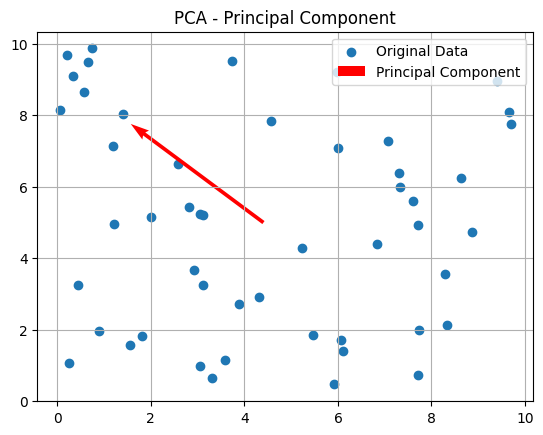

In [27]:
from sklearn.decomposition import PCA

np.random.seed(42)
X = np.random.rand(50, 2) * 10

# Apply PCA to reduce the dataset to 1 principal component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

print("Transformed data:\n", X_pca)

plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), *pca.components_[0], scale=3, color='r', label='Principal Component')
plt.legend()
plt.title('PCA - Principal Component')
plt.grid(True)
plt.show()


#### 1.4.3.3 Total Variance

The total variance in the data is the sum of the variances of all the individual variables, which is equal to the sum of the eigenvalues of the covariance matrix $S$. The total variance is given by:

$$
\text{Total Variance} = \text{tr}(S) = \frac{1}{N-1} \sum_{j=1}^{p} \lambda_j
$$

Where $\lambda_j$ are the eigenvalues of $S$. The proportion of the total variance explained by the first $k$ principal components is:

$$
\frac{\sum_{j=1}^{k} \lambda_j}{\sum_{j=1}^{p} \lambda_j}
$$

This ratio is used to determine how many principal components should be retained to preserve most of the variance in the data.


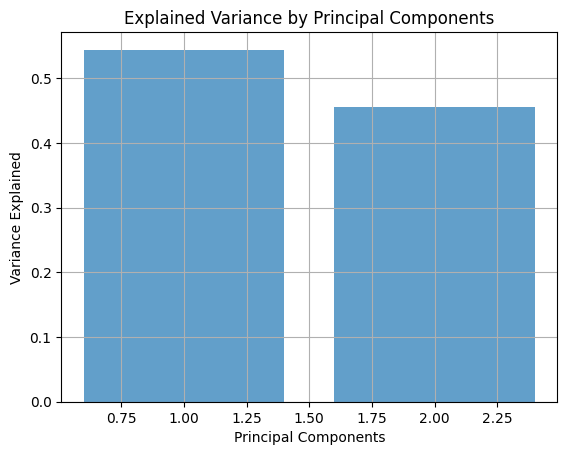

In [28]:
# Apply PCA keeping both components
pca_full = PCA(n_components=2)
pca_full.fit(X)

# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_

plt.bar(range(1, 3), explained_variance, alpha=0.7, label='Explained Variance')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()
